In [4]:
#!pip install transformers[sentencepiece]

In [5]:
#!pip install torch

In [6]:
import torch

In [7]:
from transformers import pipeline

<font size=5> Pipeline Function is the MOST HIGH LEVEL API of the transformers library </font>

It does
1. **preprocessing (converting text to numbers)**
2. **model and**
3. **post processing (human readable model inference)**

for one text or several texts at a time 

<font size=5> Sentiment Analysis </font>

In [8]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [9]:
classifier("What is the use of this pipeline")

[{'label': 'NEGATIVE', 'score': 0.9927734732627869}]

In [10]:
classifier(["What is the use of this pipeline",
            "This pipeline is very useful, I like it because I can give more than one sentence"
           ])

[{'label': 'NEGATIVE', 'score': 0.9927734732627869},
 {'label': 'POSITIVE', 'score': 0.9994450211524963}]

<font size=5> Zero Shot Classification </font>

Allows you to provide the labels you need to classify them into

In [11]:
classifier = pipeline('zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [13]:
classifier("I am Felix and I am introduced to hugging face course", 
          candidate_labels=['Business', 'Politics', 'Education'])

{'sequence': 'I am Felix and I am introduced to hugging face course',
 'labels': ['Education', 'Business', 'Politics'],
 'scores': [0.5045145750045776, 0.2822188138961792, 0.21326658129692078]}

<font size=5> Text Generation - Auto Complete a given text </font>

In [16]:
generator = pipeline('text-generation')

No model was supplied, defaulted to gpt2 (https://huggingface.co/gpt2)


<font size=3> There would be some element of randomness in the text generated each time, trying running multiple times </font>

In [20]:
generator("I like this course and would like to teach this to")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I like this course and would like to teach this to my colleagues, I have a few years left...I've been given my diploma and it has been my pleasure and thank you, I will not tell the students I'm going to be graduating today"}]

<font size=3> There are many models for each task, and we can choose the model also which is applicable for that task </font>

www.huggingface.co/models

In [47]:
generator = pipeline('text-generation', model='distilgpt2')

Downloading:   0%|          | 0.00/762 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [48]:
generator("I like this course and would like to teach this to")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I like this course and would like to teach this to you all:\n\nThis is really fun.\n-\nThe goal? I plan to spend a lot of time reading and reading!'}]

In [62]:
generator??

In [54]:
## With additional parameters
generator("I like this course and would like to teach this to", max_length=30, num_return_sequences=2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "I like this course and would like to teach this to all of you guys – I'd like to teach this to all of you guys – it would"},
 {'generated_text': 'I like this course and would like to teach this to you.\nAs if this was easy to go on, I will tell you how to make'}]

In [53]:
generator("I like this course and would like to teach this to", max_length=3, num_return_sequences=2)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 11, but ``max_length`` is set to 3. This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


[{'generated_text': 'I like this course and would like to teach this to you'},
 {'generated_text': 'I like this course and would like to teach this to those'}]

-----------------------------------------------------------------------------------------------------------------------------
<font size=5> Other piplines - [Hugging Face Models URL](https://www.huggingface.co/models) </font>

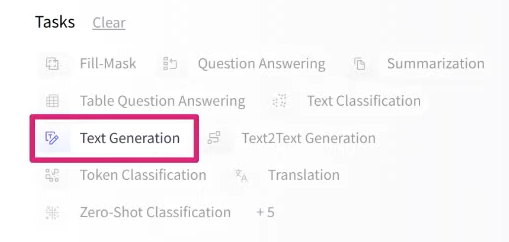

<font size=5> Fill Masked Words. BERT pretrained model was actually trained like this </font>

In [63]:
fill_masker = pipeline('fill-mask')

No model was supplied, defaulted to distilroberta-base (https://huggingface.co/distilroberta-base)


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Note that here the model fills in the special ```**<mask>**``` word, which is often referred to as a mask token. Other mask-filling models might have different mask tokens, so it’s always good to verify the proper mask word when exploring other models. One way to check it is by looking at the mask word used in the widget.

In [64]:
fill_masker("I would like to <mask> at this point in time because I am very hungry", top_k=2)

[{'sequence': 'I would like to retire at this point in time because I am very hungry',
  'score': 0.20024898648262024,
  'token': 7865,
  'token_str': ' retire'},
 {'sequence': 'I would like to stop at this point in time because I am very hungry',
  'score': 0.12000195682048798,
  'token': 912,
  'token_str': ' stop'}]

<font size=5> Named Entity Recoginition </font>

<font size=2> grouped_entities=True to group tokens (after tokenization of words) before identifying entities </font>

In [84]:
ner_extractor = pipeline('ner', grouped_entities=True)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)
C:\Users\chenn\.pyenv\pyenv-win\versions\3.8.1\lib\site-packages\transformers\pipelines\token_classification.py:128: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [90]:
ner_extractor("I am Felix. I work at H2O.ai in Chennai")

[{'entity_group': 'PER',
  'score': 0.9934314,
  'word': 'Felix',
  'start': 5,
  'end': 10},
 {'entity_group': 'ORG',
  'score': 0.8486536,
  'word': 'H2O. ai',
  'start': 22,
  'end': 28},
 {'entity_group': 'LOC',
  'score': 0.9965956,
  'word': 'Chennai',
  'start': 32,
  'end': 39}]

<font size=5> Extractive Question Answering </font>

Note that this pipeline works by extracting information from the provided context; it does not generate the answer.

In [93]:
question_answerer = pipeline('question-answering')

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [94]:
question_answerer(question="Where do I work",
                  context="I am Felix, I work at H2O.ai")

{'score': 0.5376896262168884, 'start': 22, 'end': 25, 'answer': 'H2O'}

<font size=5> Summarization </font>

In [106]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Like with text generation, you can specify a max_length or a min_length for the result.

In [107]:
summarizer("""The Constitution of India (IAST: Bhāratīya Saṃvidhāna) is the supreme law of India.
The document lays down the framework that demarcates fundamental political code, structure, procedures, powers,
and duties of government institutions and sets out fundamental rights, directive principles, and the duties of citizens.
It is the longest written constitution of any country.
It imparts constitutional supremacy (not parliamentary supremacy, since it was created by a constituent assembly
rather than Parliament) and was adopted by its people with a declaration in its preamble.
Parliament cannot override the constitution. Dr. B. R. Ambedkar and Constitution of India on a 2015 postage stamp of India
It was adopted by the Constituent Assembly of India on 26 November 1949 and became effective on 26 January 1950.""")

[{'summary_text': ' The Constitution of India (IAST: Bhāratīya Saṃvidhāna) is the supreme law of India . It was adopted by the Constituent Assembly of India on 26 November 1949 and became effective on 26 January 1950 . It is the longest written constitution of any country .'}]

<font size=5> Translation </font>

In [102]:
# Note how we can get all available tasks that pipeline can be used for from the below error
translator = pipeline("transalation") 

KeyError: "Unknown task transalation, available tasks are ['audio-classification', 'automatic-speech-recognition', 'feature-extraction', 'text-classification', 'token-classification', 'question-answering', 'table-question-answering', 'fill-mask', 'summarization', 'translation', 'text2text-generation', 'text-generation', 'zero-shot-classification', 'conversational', 'image-classification', 'image-segmentation', 'object-detection', 'translation_XX_to_YY']"

In [103]:
translator = pipeline("translation") #does not work without specifying a model

ValueError: The task defaults can't be correctly selected. You probably meant "translation_XX_to_YY"

In [104]:
translator = pipeline("translation", model='Helsinki-NLP/opus-mt-fr-en')

In [105]:
translator('Ce cours est produit par Hugging Face')

[{'translation_text': 'This course is produced by Hugging Face'}]

If you want to use default model use the following pipeline

In [110]:
translator = pipeline('translation_en_to_fr')

No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)


Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

In [111]:
translator("Hi, My name is Felix. How are you")

[{'translation_text': "Bonjour, je m'appelle Felix, comment êtes-vous?"}]

<font size=5> Tried on own </font>

<font size=5> Feature Extractor </font>

In [68]:
feat_extractor = pipeline('feature-extraction')

No model was supplied, defaulted to distilbert-base-cased (https://huggingface.co/distilbert-base-cased)


Downloading:   0%|          | 0.00/251M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [81]:
output = feat_extractor("Feliz Navidad. Happy Christmas to everyone")
len(output[0][3])

768

In [108]:
output[0][0] # I guess this will be CLS token for BERT based model

[0.3910183608531952,
 -0.2834281623363495,
 0.04684998840093613,
 0.33708086609840393,
 0.14266401529312134,
 0.12086910009384155,
 -0.1941581517457962,
 0.22690698504447937,
 -0.22561050951480865,
 -0.21884116530418396,
 0.06357097625732422,
 0.27153918147087097,
 -0.3677133619785309,
 0.20935416221618652,
 0.033292487263679504,
 -0.16386836767196655,
 -0.5180698037147522,
 -0.17201204597949982,
 -0.09553588181734085,
 0.2298751175403595,
 0.24005669355392456,
 -0.3686864972114563,
 -0.023952484130859375,
 -0.2290354073047638,
 -0.27057719230651855,
 0.018876686692237854,
 -0.03618822991847992,
 0.04839159548282623,
 -0.42396414279937744,
 0.1427609622478485,
 0.15655836462974548,
 0.020654380321502686,
 -0.12288462370634079,
 0.08828821033239365,
 -0.5413739681243896,
 -0.10670703649520874,
 -0.020678892731666565,
 0.48667120933532715,
 0.07907482981681824,
 0.04687066376209259,
 0.40630385279655457,
 -0.051872920244932175,
 3.096088767051697e-05,
 0.0752345472574234,
 0.119085460901